#### Уровень 0:

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)

Надо:
* Изобразить вектора на экране
* Изобразить точку x + y + z
* Найти угол между векторами x и y

In [22]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [136]:
x = [1, 1]
y = [2, 0]
z = [0, 2]

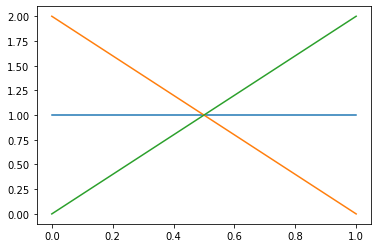

In [29]:
plt.plot(x)
plt.plot(y)
plt.plot(z)

array([3, 3])

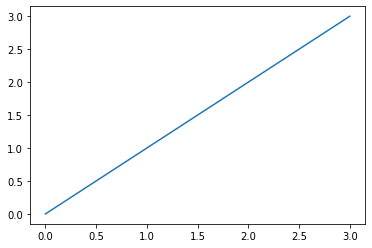

In [142]:
s = np.array(x) + np.array(y) + np.array(z)
#plt.plot(s)
plt.plot([0,s[0]], [0,s[1]])
s

In [43]:
cos_angle_xy = np.dot(x, y)/np.linalg.norm(x)/np.linalg.norm(y)
angle = np.arccos(c)
angle

0.7853981633974484

In [41]:
# проверка, так ли понял действие функции
vector_length_x = np.sqrt( (np.array(x)*np.array(x)).sum() )
print(vector_length_x, np.linalg.norm(x))

1.4142135623730951 1.4142135623730951


#### Уровень 1:
Даны дома из Бостона
Выбрать любые n домов, образующих базис в пространстве признаков дома (без medv)
Написать код разложения дома по указанному базису

In [45]:
import pandas as pd

In [190]:
df = pd.read_csv('boston_data.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [183]:
df_1 = df.loc[:, df.columns != 'medv']
df_x = df_1.loc[:12]
df_x.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12


In [176]:
df_1.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
dtype: object

In [187]:
a = np.array(df_x)
np.linalg.det(a) # определитель не равен нулю

-478254911772.19904

In [188]:
def expansion_basis(given_house):

    exp = np.linalg.solve(a, given_house)
    
    return exp

In [189]:
q = []
b = np.array(df_1.loc[:10])
for i in b:
    exp_ = expansion_basis(i)
    q.append(exp_)
q

[array([  32.69647078,   -4.98047449,  -18.42492642,  356.81869334,
        1191.37489937,  792.18886771,  -14.22612522, -256.90291425,
         163.56474497,  -11.44548382,  -80.08355108,    1.22917823,
          50.40859737]),
 array([ 3.41995715e+01, -4.15508020e+00, -1.80645951e+01,  3.00073431e+02,
         1.48866088e+03,  8.07298641e+02, -1.49655846e+01, -2.60669930e+02,
         1.67325785e+02, -1.19030426e+01, -7.55900203e+01,  9.34132241e-01,
         4.68934386e+01]),
 array([ 3.16939323e+01, -1.02353404e+01, -3.65994066e+01,  3.56736263e+02,
         1.58922327e+03,  8.25392195e+02, -1.54463568e+01, -2.49085434e+02,
         1.74369981e+02, -1.14006528e+01, -9.84172387e+01,  1.46641948e+00,
         5.24619273e+01]),
 array([  24.19996882,  -13.59641408,  -49.24636467,  486.33281561,
        1533.3657192 ,  735.94239859,  -14.14009995, -214.135423  ,
         160.51697573,   -9.69627378, -101.05059077,    1.68442977,
          51.74093761]),
 array([ 3.32822669e+01, -5.9108